In [88]:
#import
from pymatgen.ext.matproj import MPRester
from pymatgen.phonon.plotter import PhononBSPlotter
import matplotlib.pyplot as plt
import numpy as np

In [89]:
# Récupération de la structure (bande)
with MPRester("2a0sQXpqwWhCvNGk") as m:
    bandes = m.get_phonon_bandstructure_by_material_id("mp-2784")

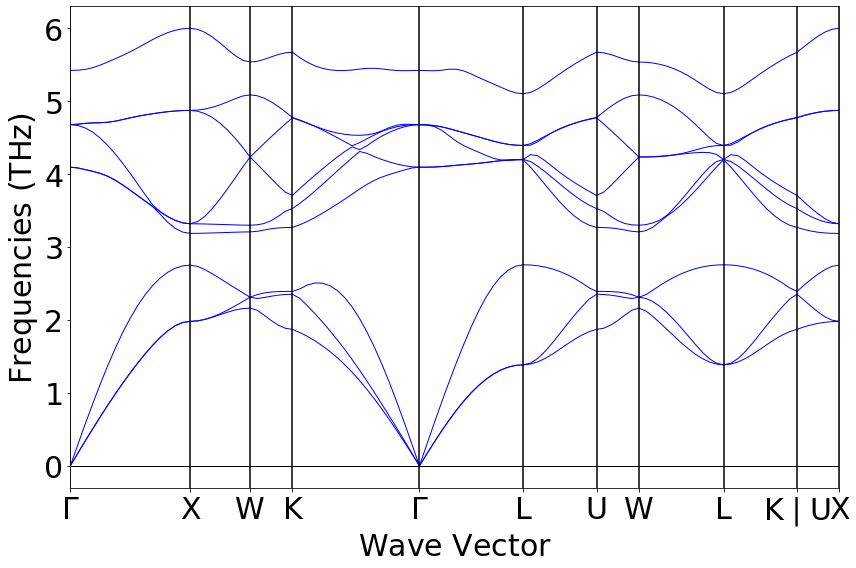

In [90]:
plotBand = phplt.PhononBSPlotter(bandes)
plotBand.show()

# La vitesse du son pour trois branches acoustiques différentes dans trois directions différentes de la zone de Brillouin

## Branches acoustiques

Une branche acoustique dans un cristal est une de ses modes de vibration dans lequel les atomes se déplacent en phase les uns avec les autres, créant ainsi une onde sonore à travers le cristal. On peut les reconnaître car leur fréquence est nulle au centre de la zone de Brillouin. Dans notre cas, nous avons les zones Γ-X, K-Γ et Γ-L.

## Vitesse du son

La vitesse du son dans un solide correspond à la vitesse de propagation de phonons dans le cristal, dans la zone de Brillouin.
Cette vitesse du son est la vitesse de phase. C'est à dire la vitesse de groupe, obtenue par la formule $v_{g} = \frac{dw}{dq} = 
\frac{w}{|q|} = 2*\pi*\frac{df}{dq}$, pour de grandes longueurs d'onde (q->0, $\lambda>>>a$ avec a le paramètre de maille). Avec w la relation de dispersion du cristal et q le vecteur d'onde. On va donc utiliser la pente des courbes dans les 3 directions.

In [91]:
#obtenir données principales du réseau
data = PhononBSPlotter(bandes).bs_plot_data()
freq = data['frequency'] ;
dist = data['distances'];

In [92]:
#Direction 1 : Γ-X
freq2 = freq[0][1][1]*(10**12); # THz -> Hz
freq1 = freq[0][1][0]*(10**12); 
dist2 = dist[0][1]*(10**10); #Å->m^-1
dist1 = dist[0][0]*(10**10);
vitesse1 = 2*np.pi*np.abs(((freq2-freq1)/(dist2-dist1)));
print("la vitesse de son dans la branche acoustique dans la direction Γ-X vaut : {0:.3f} m/s".format(vitesse1));

la vitesse de son dans la branche acoustique dans la direction Γ-X vaut : 1999.093 m/s


In [93]:
#Direction 2 : K-Γ
freq2 = freq[3][0][-1]*(10**12); # THz -> Hz
freq1 = freq[3][0][-2]*(10**12); 
dist2 = dist[3][-1]*(10**10); #Å->m^-1
dist1 = dist[3][-2]*(10**10);
vitesse2 = 2*np.pi*np.abs(((freq2-freq1)/(dist2-dist1)));
print("la vitesse de son dans la branche acoustique dans la direction K-Γ vaut : {0:.3f} m/s".format(vitesse2));

la vitesse de son dans la branche acoustique dans la direction K-Γ vaut : 1888.999 m/s


In [94]:
#Direction 3 : Γ-L
freq2 = freq[4][2][1]*(10**12); # THz -> Hz
freq1 = freq[4][2][0]*(10**12); 
dist2 = dist[4][1]*(10**10); #Å->m^-1
dist1 = dist[4][0]*(10**10);
vitesse3 = 2*np.pi*np.abs(((freq2-freq1)/(dist2-dist1)));
print("la vitesse de son dans la branche acoustique dans la direction Γ-L vaut : {0:.3f} m/s".format(vitesse3));

la vitesse de son dans la branche acoustique dans la direction Γ-L vaut : 3456.239 m/s
